<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMMIRO_Modulo_1_Semana_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
# Silvia Miró
# Modulo 1 - Semana 1

# Actividad 1- Asignar valores a R=1, L=1Hy, y C=1F.
# a. Empleando la solución analítica, simular 3 segundos con una entrada de
# tensión escalón de 12V.
# b. Empleando el cálculo mediante Euler, verificar que coincida con el ítem
# anterior.


import numpy as np
from matplotlib import pyplot as plt

# Parámetros del circuito
R = 1      # Ohm
L = 1      # H
C = 1      # F
h = 1e-2   # Paso de tiempo
t_simul = 8  # Tiempo de simulación (3 segundos)

# Matrices del sistema
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicialización
t = np.arange(0, t_simul, h)
x1 = np.zeros_like(t)  # Corriente i_L(t)
x2 = np.zeros_like(t)  # Voltaje V_C(t)
u = np.zeros_like(t)   # Entrada Va(t)

# Condiciones iniciales
x = np.array([[0], [0]])  # [i_L(0); V_C(0)]
Va = 12  # Escalón de 12V

# Simulación con Euler
for ii in range(len(t)):
    xp = np.matmul(A, x) + B * Va  # dx/dt = A*x + B*u
    x = x + xp * h  # Método de Euler
    x1[ii] = x[0]   # Almacena corriente
    x2[ii] = x[1]   # Almacena voltaje en C
    u[ii] = Va      # Almacena entrada

# Solución analítica (subamortiguada)
omega_0 = 1 / np.sqrt(L * C)       # Frecuencia natural (1 rad/s)
zeta = R / (2 * np.sqrt(L / C))    # Factor de amortiguamiento (0.5)
omega_d = omega_0 * np.sqrt(1 - zeta**2)  # Frecuencia amortiguada (√3/2 rad/s)

# Corriente i(t)
i_analitico = 12 * (2 * np.sqrt(3)/3) * np.exp(-zeta * omega_0 * t) * np.sin(omega_d * t)

# Voltaje V_C(t)
Vc_analitico = 12 * (1 - (2 * np.sqrt(3)/3) * np.exp(-zeta * omega_0 * t) * np.sin(omega_d * t + np.pi/3))

# Gráficos
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('Circuito RLC Subamortiguado (R=1Ω, L=1H, C=1F)')

# Corriente i_L(t)
axs[0].plot(t, x1, 'b-', label='Simulación (Euler)')
axs[0].plot(t, i_analitico, 'r--', label='Solución analítica')
axs[0].set_ylabel('$i_L(t)$ (A)')
axs[0].grid(True)
axs[0].legend()

# Voltaje V_C(t)
axs[1].plot(t, x2, 'b-', label='Simulación (Euler)')
axs[1].plot(t, Vc_analitico, 'r--', label='Solución analítica')
axs[1].set_ylabel('$V_C(t)$ (V)')
axs[1].grid(True)
axs[1].legend()

# Entrada Va(t)
axs[2].plot(t, u, 'g-', label='Entrada $V_a(t)$')
axs[2].set_ylabel('$V_a(t)$ (V)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid(True)

plt.tight_layout()
plt.show()

In [31]:
from sympy import *
import numpy as np
from sympy.functions.special.delta_functions import Heaviside
init_printing(use_unicode=True)

# Definir variables simbólicas
t = symbols('t', real=True, positive=True)
ii = Function('ii')(t)
v = Function('v')(t)

# Definir las ecuaciones diferenciales
ODE1 = Eq(diff(ii, t), -ii - v + 12* Heaviside(t))  # Corregido: Heaviside(t) en lugar de Heaviside(0)
ODE2 = Eq(diff(v, t), ii)

# Resolver el sistema
sol = dsolve([ODE1, ODE2], [ii, v], ics={ii.subs(t,0): 0, v.subs(t,0): 0})

# Mostrar resultados
print("Solución para la corriente i(t):")
display(sol[0])
print("\nSolución para el voltaje v(t):")
display(sol[1])

# Simplificar resultados
ten = simplify(sol[1].rhs)
corr = simplify(sol[0].rhs)

print("\nSolución simplificada para v(t):")
display(ten)
print("\nSolución simplificada para i(t):")
display(corr)

Solución para la corriente i(t):


              -t           
              ───          
               2     ⎛√3⋅t⎞
ii(t) = 8⋅√3⋅ℯ   ⋅sin⎜────⎟
                     ⎝ 2  ⎠


Solución para el voltaje v(t):


                                             -t                  -t           
                                             ───                 ───          
             2⎛√3⋅t⎞         2⎛√3⋅t⎞          2     ⎛√3⋅t⎞        2     ⎛√3⋅t⎞
v(t) = 12⋅sin ⎜────⎟ + 12⋅cos ⎜────⎟ - 4⋅√3⋅ℯ   ⋅sin⎜────⎟ - 12⋅ℯ   ⋅cos⎜────⎟
              ⎝ 2  ⎠          ⎝ 2  ⎠                ⎝ 2  ⎠              ⎝ 2  ⎠


Solución simplificada para v(t):


           -t               
           ───              
            2     ⎛√3⋅t   π⎞
12 - 8⋅√3⋅ℯ   ⋅sin⎜──── + ─⎟
                  ⎝ 2     3⎠


Solución simplificada para i(t):


      -t           
      ───          
       2     ⎛√3⋅t⎞
8⋅√3⋅ℯ   ⋅sin⎜────⎟
             ⎝ 2  ⎠

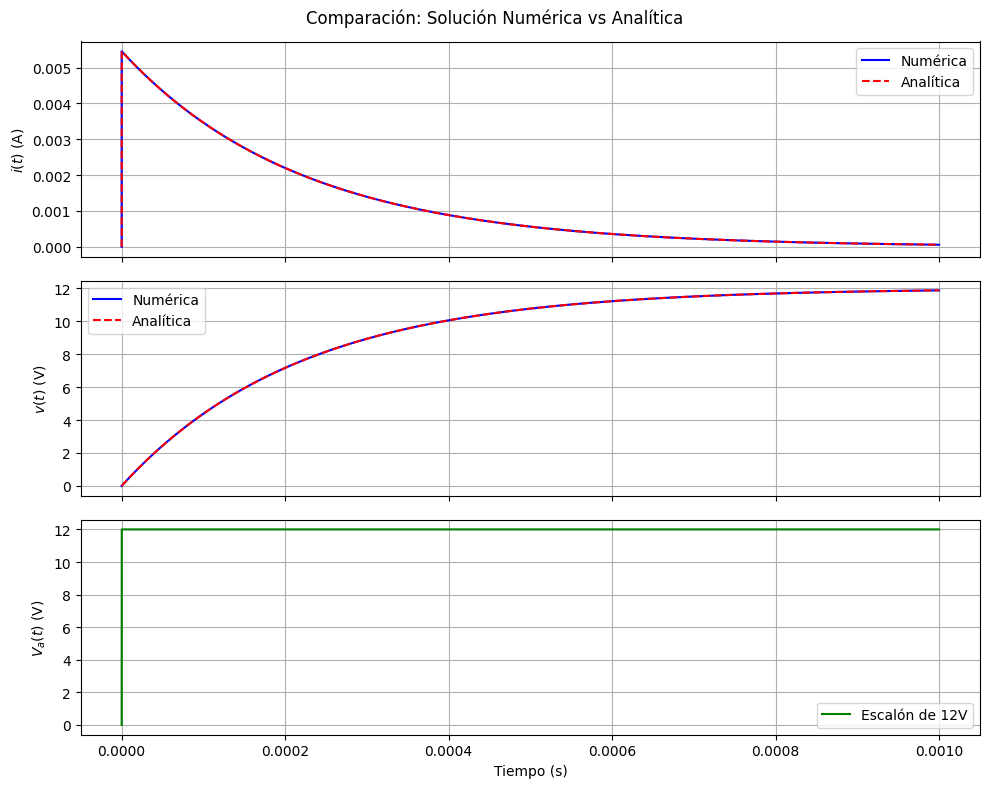

In [37]:
import numpy as np
import matplotlib.pyplot as plt

# ========== PARÁMETROS DE SIMULACIÓN ==========
h = 1e-9           # Paso de tiempo (1 ns)
t_simul = 1e-3     # Tiempo de simulación (10 µs)
R = 2.2e3          # Resistencia (2.2 kΩ)
L = 10e-6          # Inductancia (10 µH)
C = 100e-9         # Capacitancia (100 nF)

# ========== SOLUCIÓN NUMÉRICA ==========
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicialización de variables
x1 = np.zeros(int(t_simul / h))  # Corriente i(t)
x2 = np.zeros(int(t_simul / h))  # Tensión v(t)
u = np.zeros(int(t_simul / h))   # Entrada Va(t)
t = np.zeros(int(t_simul / h))   # Vector de tiempo

x = np.array([[0.0], [0.0]])     # Condiciones iniciales [i(0)=0, v(0)=0]
Va = 0                           # Voltaje inicial Va(0)=0

for ii in range(int(t_simul / h)):
    xp = np.matmul(A, x) + B * Va  # Derivada del estado
    x = x + xp * h                 # Integración Euler
    u[ii] = Va                     # Almacena Va(t)
    Va = 12                        # Escalón de 12V en t > 0
    x1[ii] = x[0, 0]               # Almacena i(t)
    x2[ii] = x[1, 0]               # Almacena v(t)
    t[ii] = ii * h                 # Almacena tiempo

# ========== SOLUCIÓN ANALÍTICA ==========
i_analitico = 0.00545477 * np.exp(-4545.55 * t) - 0.00545477 * np.exp(-2.19995e8 * t)
v_analitico = 12 + 0.000247949 * np.exp(-2.19995e8 * t) - 12.0002 * np.exp(-4545.55 * t)

# ========== GRÁFICAS ==========
fig, axs = plt.subplots(3, figsize=(10, 8), sharex=True)
fig.suptitle('Comparación: Solución Numérica vs Analítica')

# --- Gráfica 1: Corriente i(t) ---
axs[0].plot(t, x1, 'b-', linewidth=1.5, label='Numérica')
axs[0].plot(t, i_analitico, 'r--', linewidth=1.5, label='Analítica')
axs[0].set_ylabel('$i(t)$ (A)')
axs[0].grid(True)
axs[0].legend()

# --- Gráfica 2: Tensión v(t) ---
axs[1].plot(t, x2, 'b-', linewidth=1.5, label='Numérica')
axs[1].plot(t, v_analitico, 'r--', linewidth=1.5, label='Analítica')
axs[1].set_ylabel('$v(t)$ (V)')
axs[1].grid(True)
axs[1].legend()

# --- Gráfica 3: Entrada Va(t) ---
axs[2].plot(t, u, 'g-', linewidth=1.5, label='Escalón de 12V')
axs[2].set_ylabel('$V_a(t)$ (V)')
axs[2].set_xlabel('Tiempo (s)')
axs[2].grid(True)
axs[2].legend()

plt.tight_layout()
plt.show()

SyntaxError: invalid decimal literal (<ipython-input-25-c78b34371c9c>, line 10)

<ipython-input-16-4e41561061b3>:53: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x1[ii] = x[0]  # Corriente i_L
<ipython-input-16-4e41561061b3>:54: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  x2[ii] = x[1]  # Voltaje v_c


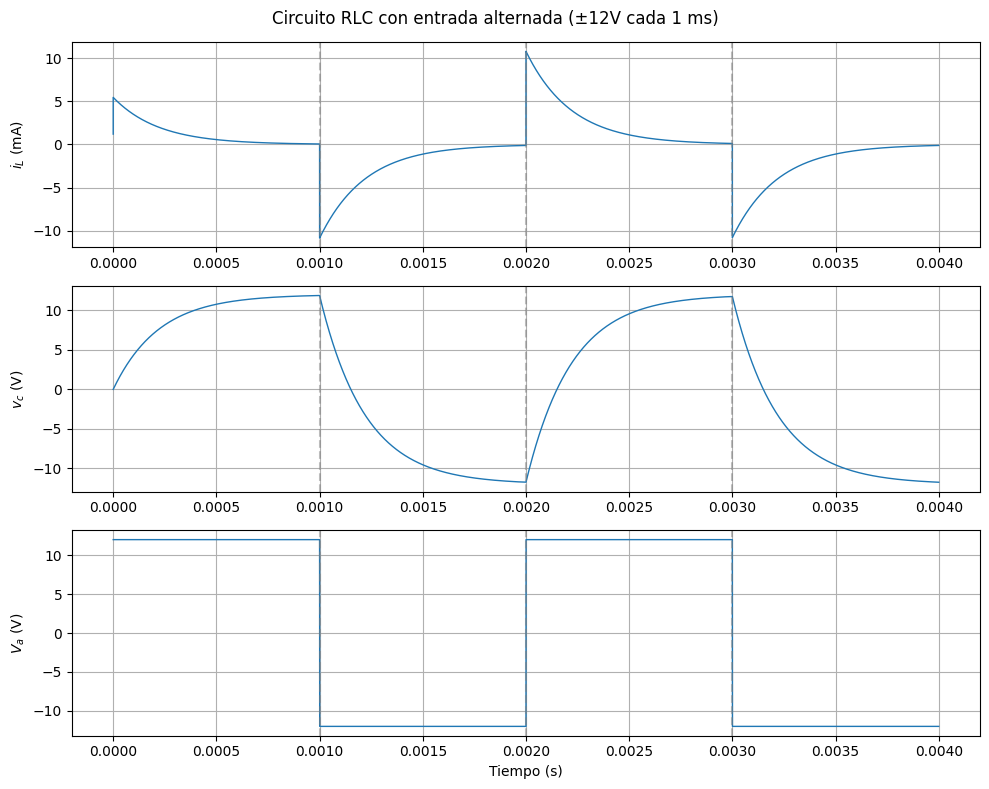

In [16]:
# Curso HERRAMIENTAS DE CÁLCULO Y SIMULACIÓN DE PROCESOS DINÁMICOS
# Silvia Miró
# Modulo 1 - Semana 1

# Actividad 3
# Asignar valores a R=2,2 KOhm, L=10 microHy, y C=100 nF. Obtener simulaciones que
# permitan estudiar la dinámica del sistema, con una entrada de tensión escalón
# de 12V que cambia de signo cada 1 ms.

import numpy as np
import scipy as sp
import scipy.signal
from matplotlib import pyplot as plt
from pylab import *

h = 1e-9  # Paso de tiempo
t_simul = 4e-3  # Extendemos la simulación a 4 ms para ver 2 ciclos completos
R = 2.2e3  # 2.2 kOhm
L = 10e-6  # 10 microHenrios
C = 100e-9  # 100 nF

# Matrices del sistema
A = np.array([[-R/L, -1/L], [1/C, 0]])
B = np.array([[1/L], [0]])

# Inicialización de variables
x1 = np.linspace(0, 0, int(t_simul/h))  # Corriente (i_L)
x2 = np.linspace(0, 0, int(t_simul/h))  # Voltaje en capacitor (v_c)
u = np.linspace(0, 0, int(t_simul/h))   # Voltaje de entrada (V_a)
t = np.linspace(0, 0, int(t_simul/h))   # Vector de tiempo

# Condiciones iniciales
Va = 12  # Voltaje inicial (empezamos con +12V)
x = np.array([[0], [0]])  # [i_L(0); v_c(0)]
xp = np.array([[0], [0]])

# Simulación
for ii in range(int(t_simul/h)):
    # Cambio de polaridad cada 1 ms
    if ii * h >= 1e-3 and ii * h < 2e-3:
        Va = -12
    elif ii * h >= 2e-3 and ii * h < 3e-3:
        Va = 12
    elif ii * h >= 3e-3:
        Va = -12

    # Integración del sistema
    xp = np.matmul(A, x) + B * Va
    x = x + xp * h

    # Almacenamiento de resultados
    u[ii] = Va
    x1[ii] = x[0]  # Corriente i_L
    x2[ii] = x[1]  # Voltaje v_c
    t[ii] = ii * h

# Gráficos
fig, axs = plt.subplots(3, figsize=(10, 8))
fig.suptitle('Circuito RLC con entrada alternada (±12V cada 1 ms)')

# Corriente en el inductor
axs[0].plot(t, x1 * 1000, linewidth=1.0)  # Convertimos a mA
axs[0].grid(True)
axs[0].set_ylabel('$i_L$ (mA)')

# Voltaje en el capacitor
axs[1].plot(t, x2, linewidth=1.0)
axs[1].set_ylabel('$v_c$ (V)')
axs[1].grid(True)

# Voltaje de entrada
axs[2].plot(t, u, linewidth=1.0)
axs[2].grid(True)
axs[2].set_ylabel('$V_a$ (V)')
axs[2].set_xlabel('Tiempo (s)')

# Líneas verticales para marcar los cambios
for ms in [1e-3, 2e-3, 3e-3]:
    axs[0].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)
    axs[1].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)
    axs[2].axvline(x=ms, color='gray', linestyle='--', alpha=0.5)

plt.tight_layout()
show()